# Getting the A vs E

Jita (23 Jan 2023)

In [1]:
# Set up python environment
from pygama.raw.build_raw import build_raw
from pygama.dsp import build_dsp
#from pygama.lgdo import ls
from pygama.lgdo.lh5_store import LH5Store, load_dfs, ls

dsp_file = "/global/u2/j/jita/pygama-v1.0/legend-analysis-tutorials/LNGS-data/r014/l60-p01-r014-cal-20220716T085231Z-tier_dsp.lh5"
dsp_config = "./metadata/dsp_config.json"

## Inspecting the dsp file

In [2]:
print("List of dsp file elements:")
ls(dsp_file,'ch002/dsp/')

List of raw file elements:


['ch002/dsp/A_max',
 'ch002/dsp/QDrift',
 'ch002/dsp/bl_intercept',
 'ch002/dsp/bl_mean',
 'ch002/dsp/bl_slope',
 'ch002/dsp/bl_std',
 'ch002/dsp/cuspEftp',
 'ch002/dsp/cuspEmax',
 'ch002/dsp/dt_eff',
 'ch002/dsp/pz_mean',
 'ch002/dsp/pz_slope',
 'ch002/dsp/pz_std',
 'ch002/dsp/tp_01',
 'ch002/dsp/tp_0_atrap',
 'ch002/dsp/tp_0_est',
 'ch002/dsp/tp_10',
 'ch002/dsp/tp_100',
 'ch002/dsp/tp_20',
 'ch002/dsp/tp_50',
 'ch002/dsp/tp_80',
 'ch002/dsp/tp_90',
 'ch002/dsp/tp_95',
 'ch002/dsp/tp_99',
 'ch002/dsp/tp_aoe_max',
 'ch002/dsp/tp_aoe_samp',
 'ch002/dsp/tp_max',
 'ch002/dsp/tp_min',
 'ch002/dsp/trapEmax',
 'ch002/dsp/trapTmax',
 'ch002/dsp/wf_max',
 'ch002/dsp/wf_min',
 'ch002/dsp/zacEftp',
 'ch002/dsp/zacEmax']

Data from file:
          trapEmax       A_max
0       383.815613   35.498283
1      3128.956787  208.860672
2      2102.550781  101.537979
3      1329.846802  102.036369
4       629.822754   59.439739
...            ...         ...
77648  1596.475464  127.947380
77649   856.313232         NaN
77650   846.039490   68.221268
77651   800.476562   69.754860
77652   125.378899   36.973324

[77653 rows x 2 columns]


array([[<AxesSubplot:title={'center':'trapEmax'}>]], dtype=object)

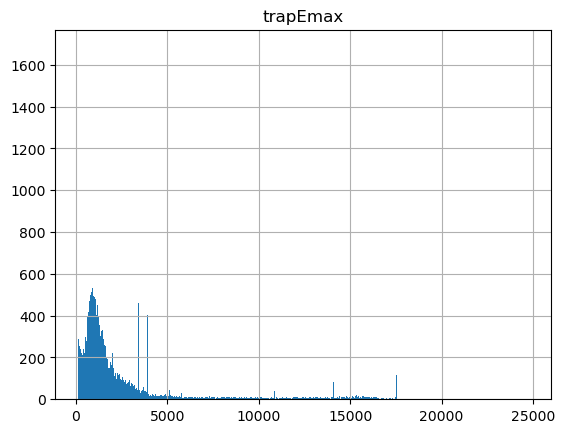

In [3]:
print("Data from file:")
raw_df = load_dfs(dsp_file,
                  par_list = ['trapEmax', 'A_max'],
                  lh5_group = 'ch002/dsp/')
print(raw_df)

raw_df.hist('trapEmax', bins=2000)

array([[<AxesSubplot:title={'center':'A_max'}>]], dtype=object)

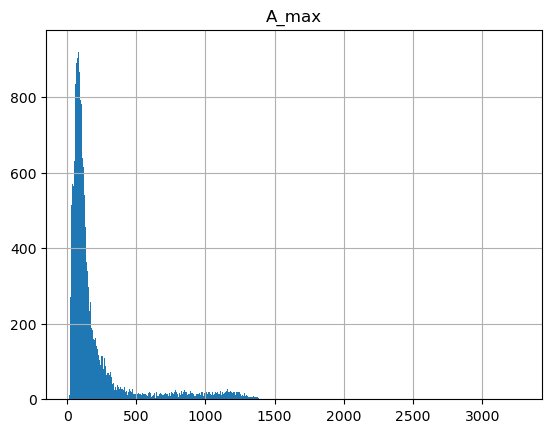

In [42]:
raw_df.hist('A_max', bins=2000)

In [46]:
#Current is nan for some waveforms and these have to be removed - should have a look at the pertinent waveforms as well.
raw_df2=raw_df.dropna()
raw_df2[raw_df2.isna().any(axis=1)]

,trapEmax,A_max


In [49]:
x=raw_df2['trapEmax'].to_numpy()
print(x)
y=raw_df2['A_max'].to_numpy()/raw_df2['trapEmax'].to_numpy()
print(y)

[ 383.8156  3128.9568  2102.5508  ...  846.0395   800.47656  125.3789 ]
[0.09248786 0.0667509  0.04829276 ... 0.08063603 0.08714166 0.29489273]


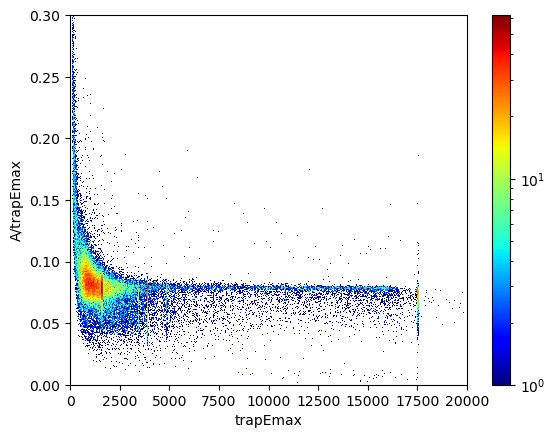

In [58]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
plt.hist2d(x, y,
           bins = 500, 
           range = [[0,20000],[0,0.3]],
           norm = mpl.colors.LogNorm(), 
           cmap =plt.cm.jet)
plt.ylabel("A/trapEmax")
plt.xlabel("trapEmax")
plt.colorbar()
plt.savefig('AotrapEmax.png')
#plt.hist2d(raw_df['trapEmax'].to_numpy(),raw_df['A_max'].to_numpy(), bins=(300, 300),cmap=plt.cm.jet) #norm=mpl.colors.LogNorm(),
#par.show()
#fig = px.density_heatmap(raw_df, x='trapEmax', y='A_max', nbinsx=200, nbinsy=2000, color_continuous_scale="Viridis")
#fig.show()
#ax1 = raw_df.plot.scatter(x='trapEmax',y='A_max',c='DarkBlue')
#plt.xlabel("trapEmax")
#plt.ylabel("A_max")
#plt.draw()
#plt.show()